In [104]:
import numpy as np
import matplotlib.pyplot as plt
import copy


In [105]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

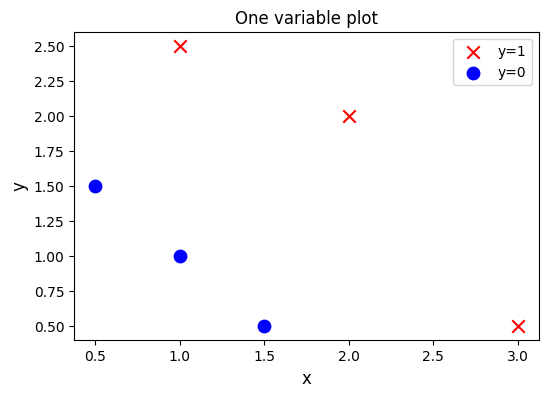

In [106]:
pos = y_train == 1
neg = y_train == 0
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(X_train[pos,0],X_train[pos,1],marker='x',s=80,c='r',label='y=1')
ax.scatter(X_train[neg,0],X_train[neg,1],marker='o',s=80,c='b',label='y=0')
ax.set_ylabel('y',fontsize=12)
ax.set_xlabel('x',fontsize=12)
ax.set_title("One variable plot")
ax.legend();


In [107]:
def sigmoid(z_init):
    g= 1/(1+np.exp(-z_init))
    return g
    

In [108]:
z = np.linspace(-10,11)


In [109]:
def compute_gradient(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        z_i = np.dot(x[i],w) + b
        f_wb = sigmoid(z_i)
        error = (f_wb - y[i])
        dj_db = dj_db + error

        for j in range(n):
            dj_dw[j] = dj_dw[j] + error * x[i,j]

    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_db,dj_dw

In [110]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [111]:
def gradient_descent(x,y,w,b,alpha,num_iter):
    for i in range(num_iter):
        dj_db , dj_dw = compute_gradient(x,y,w,b) 
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w,b
    


In [112]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

ValueError: setting an array element with a sequence.